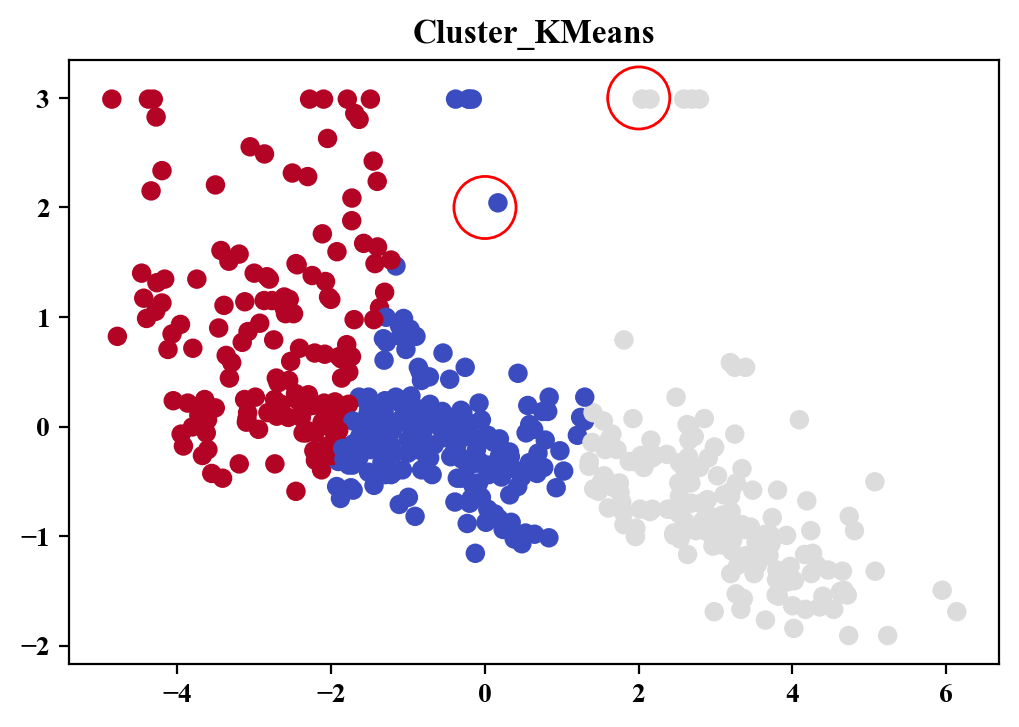

In [26]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from matplotlib import cm
data_pool=load_boston()
X=data_pool.data
Y=data_pool.target
X=StandardScaler().fit_transform(X)
x=PCA(n_components=1).fit_transform(X)
y=StandardScaler().fit_transform(Y.reshape(-1,1))
data=np.c_[x,y]
clt=KMeans(n_clusters=3)
clt.fit(data)
plt.figure(dpi=200)
plt.rc('font',family='Times New Roman')
plt.scatter(x[:,0],y[:,0],c=clt.labels_,cmap=cm.coolwarm)
plt.scatter(0,2,s=500,edgecolors='r',color='')
plt.scatter(2,3,s=500,color='',edgecolors='r')
plt.title('Cluster_KMeans')
plt.show()

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_boston
from sklearn.preprocessing.data import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import cm
# 读取全数据集
bostondata = load_boston()
boston_X = bostondata.data
boston_Y = bostondata.target
# 进行全数据集归一化
scale = StandardScaler()
boston_std = scale.fit_transform(boston_X)
boston_y=scale.fit_transform(boston_Y.reshape(-1,1))
# 数据集降维为3维，方便可视化调参。
pca = PCA(n_components=1)
boston_full = pca.fit_transform(boston_std)
boston_full=np.c_[boston_full,boston_y]
# 分类
clt = DBSCAN(eps=0.4, min_samples=5, n_jobs=4)
clt.fit(X=boston_full)
# 给定输出数据
data=boston_X[clt.labels_==0]
target=boston_Y[clt.labels_==0]
np.savetxt('Boston_data',data,delimiter=',')
np.savetxt('Boston_txt',target,delimiter=',')
plt.figure(dpi=200)
plt.rc('font',family='Times New Roman')
plt.scatter(boston_full[:,0],boston_full[:,1],c=clt.labels_,cmap=cm.coolwarm)
plt.title('Cluster_DBSCAN')
# plt.show()

Text(0.5, 1.0, 'Cluster_DBSCAN')

In [1]:
from likefunctions_boston import spl_and_Std_boston
from sklearn.linear_model import LinearRegression
result=[]
for i in range(100):
    x_train,x_test,y_train,y_test=spl_and_Std_boston()
    clf=LinearRegression(fit_intercept=True)
    clf.fit(x_train,y_train)
    score=clf.score(x_test,y_test)
    result.append(score)
print(score.mean())

0.815087332689197


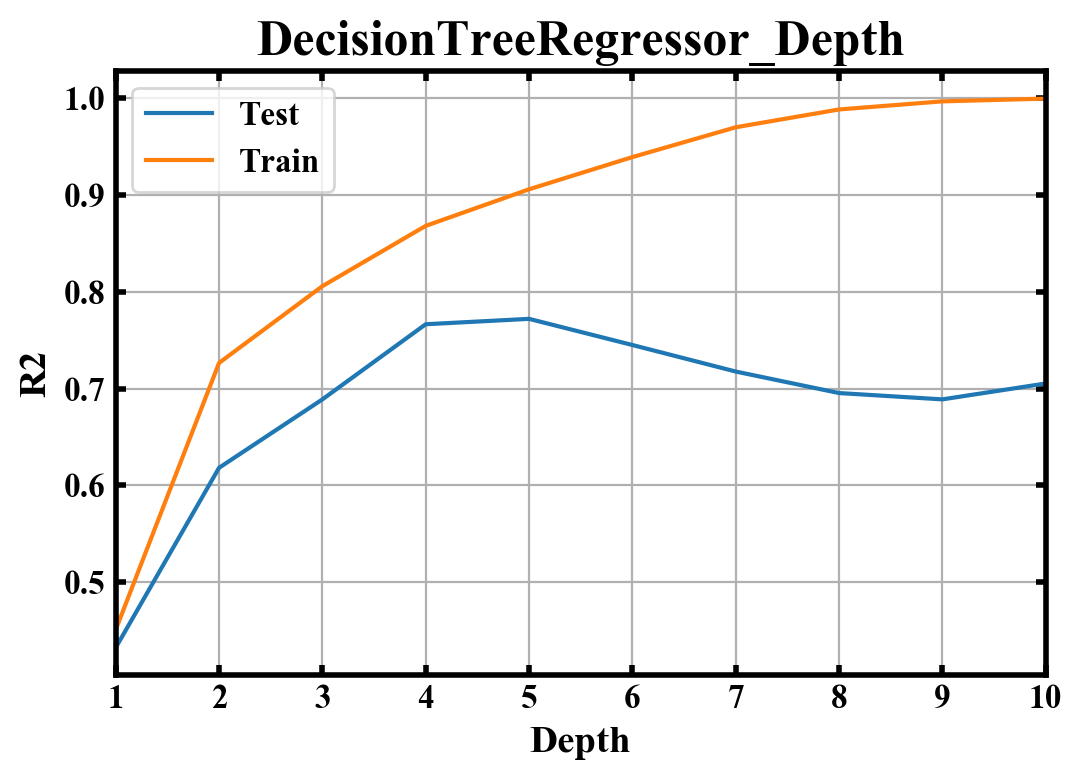

In [5]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_depth_random_100,spl_and_Std_boston,Dtr_depth_pca_random_100
import numpy as np
number=10
result=np.zeros((number))
result_train=np.zeros((number))
for depth,idx in enumerate(range(number)):
    accuracy,accuracy_train=Dtr_depth_pca_random_100(Depth=depth+1)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Depth',ylabel='R2',title='DecisionTreeRegressor_Depth')
plt.plot(list(range(1,number+1)),result)
plt.plot(list(range(1,number+1)),result_train)
plt.xticks(range(1,number+1,int(number/10)))
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,number)
plt.show()

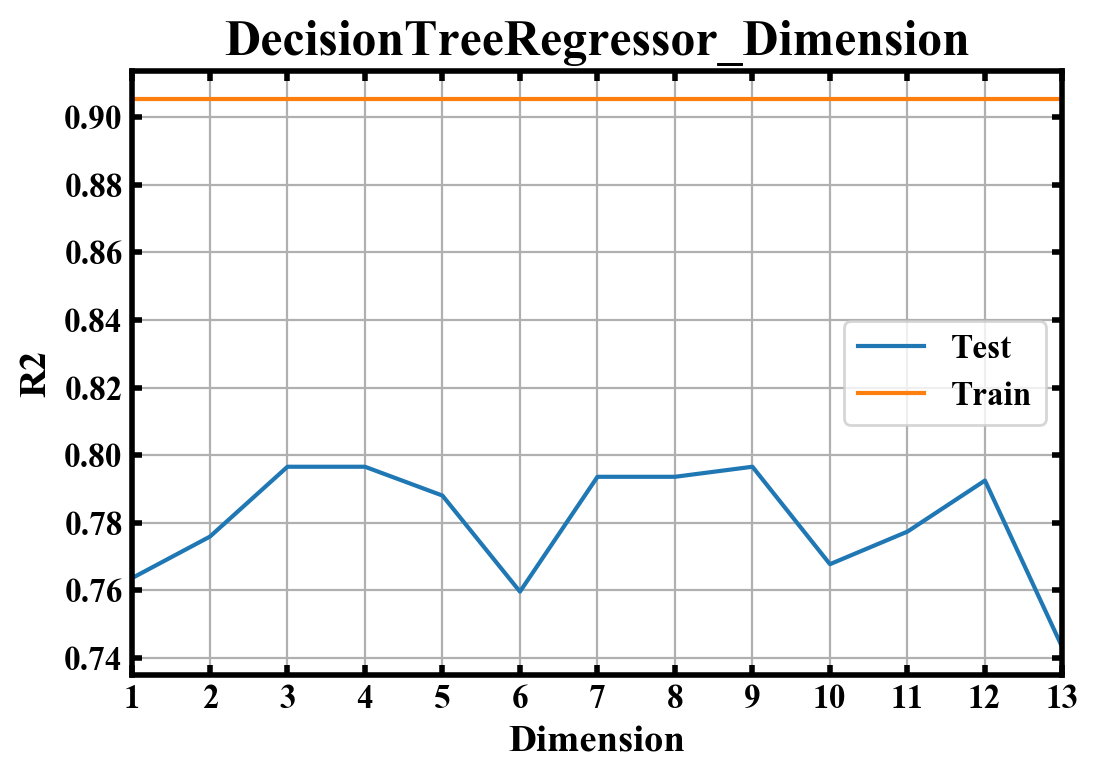

In [11]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_pca
import numpy as np
number=13
result=np.zeros((number))
result_train=np.zeros((number))
for dimension,idx in enumerate(range(number)):
    accuracy,accuracy_train=Dtr_pca(dimension=dimension+1)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Dimension',ylabel='R2',title='DecisionTreeRegressor_Dimension')
plt.plot(list(range(1,number+1)),result)
plt.plot(list(range(1,number+1)),result_train)
plt.xticks(range(1,number+1,int(number/10)))
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(1,number)
plt.show()

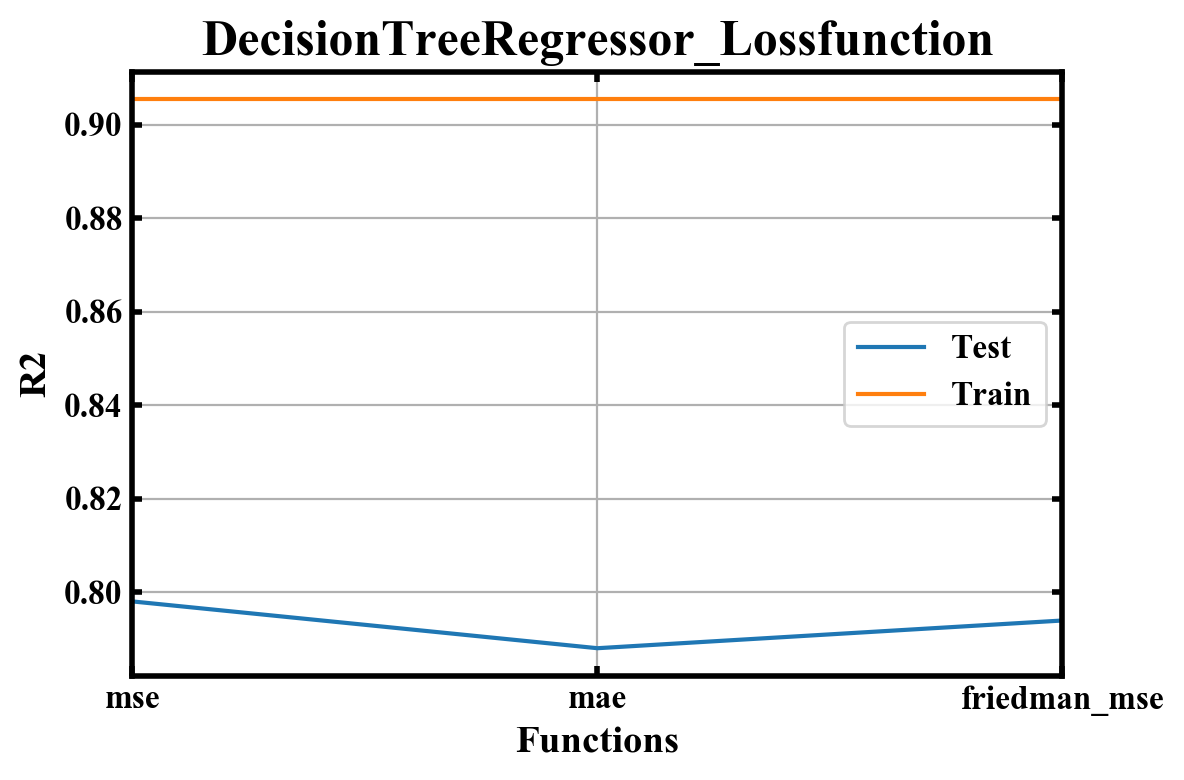

In [10]:
from matplotlib import pyplot as plt
from likefunctions_boston import plotlikeconfig,Dtr_lossf
import numpy as np
from math import ceil
C=['mse','mae','friedman_mse']
number=len(C)
result=np.zeros(number)
result_train=np.zeros(number)
for idx,i in enumerate(C):
    accuracy,accuracy_train=Dtr_lossf(function=i)
    result[idx]=accuracy.mean()
    result_train[idx]=accuracy_train.mean()
plotlikeconfig(xlabel='Functions',ylabel='R2',title='DecisionTreeRegressor_Lossfunction')
plt.plot(C,result)
plt.plot(result_train)
plt.tick_params(direction='in',width=2,top=True,right=True)
plt.legend(['Test', 'Train'],fontsize=12)
plt.grid()
plt.xlim(0,number-1)
plt.show()